In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Libs
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score

# Using warnings lib to supress the clutter
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing and Exploratory Data Analysis

In this section, we will be performing the data preprocessing step of our analysis. This includes checking for null values, cleaning up and removing variables that aren't useful to our analysis, and a statistical analysis of our data. We will also be visualizing our data with boxplots to check for outliers and distribution plots to understand the data's distribution. More specifically, we will be looking at the variables with a higher number of outliers than the other variables. We may also try removing outliers from our data to see if it helps our findings.

### Taking a look at the data and cleaning it up

In [2]:
# Read in the data
rawDF = pd.read_csv("Cancer_Data.csv")

# Get a quick understanding of our data
rawDF.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [3]:
# Take a peak at the data
rawDF.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Check for NA values in the dataset
for col in rawDF:
    naCount = rawDF[col].isna().sum()
    print(f"The number of NA values in the {col} col is {naCount}")

The number of NA values in the id col is 0
The number of NA values in the diagnosis col is 0
The number of NA values in the radius_mean col is 0
The number of NA values in the texture_mean col is 0
The number of NA values in the perimeter_mean col is 0
The number of NA values in the area_mean col is 0
The number of NA values in the smoothness_mean col is 0
The number of NA values in the compactness_mean col is 0
The number of NA values in the concavity_mean col is 0
The number of NA values in the concave points_mean col is 0
The number of NA values in the symmetry_mean col is 0
The number of NA values in the fractal_dimension_mean col is 0
The number of NA values in the radius_se col is 0
The number of NA values in the texture_se col is 0
The number of NA values in the perimeter_se col is 0
The number of NA values in the area_se col is 0
The number of NA values in the smoothness_se col is 0
The number of NA values in the compactness_se col is 0
The number of NA values in the concavity_

In [5]:
# As we can see there is a unamed column that contains only null values lets remove it along with the 'id' column since we don't need these
cleanedDF = rawDF.drop(["Unnamed: 32","id"], axis = 1)

# While we're modifiying variables though, let's go ahead and make the diagnosis numerical
cleanedDF.diagnosis = [1 if each == "M" else 0 for each in cleanedDF.diagnosis]

In [6]:
# Separate the categorical variables and the numeric variables into separate lists to analyze
categorical = cleanedDF.select_dtypes(include=['object', 'category']).columns.tolist()
numeric = cleanedDF.select_dtypes(include=['int64', 'float64']).columns.tolist()

### Correlation heatmap

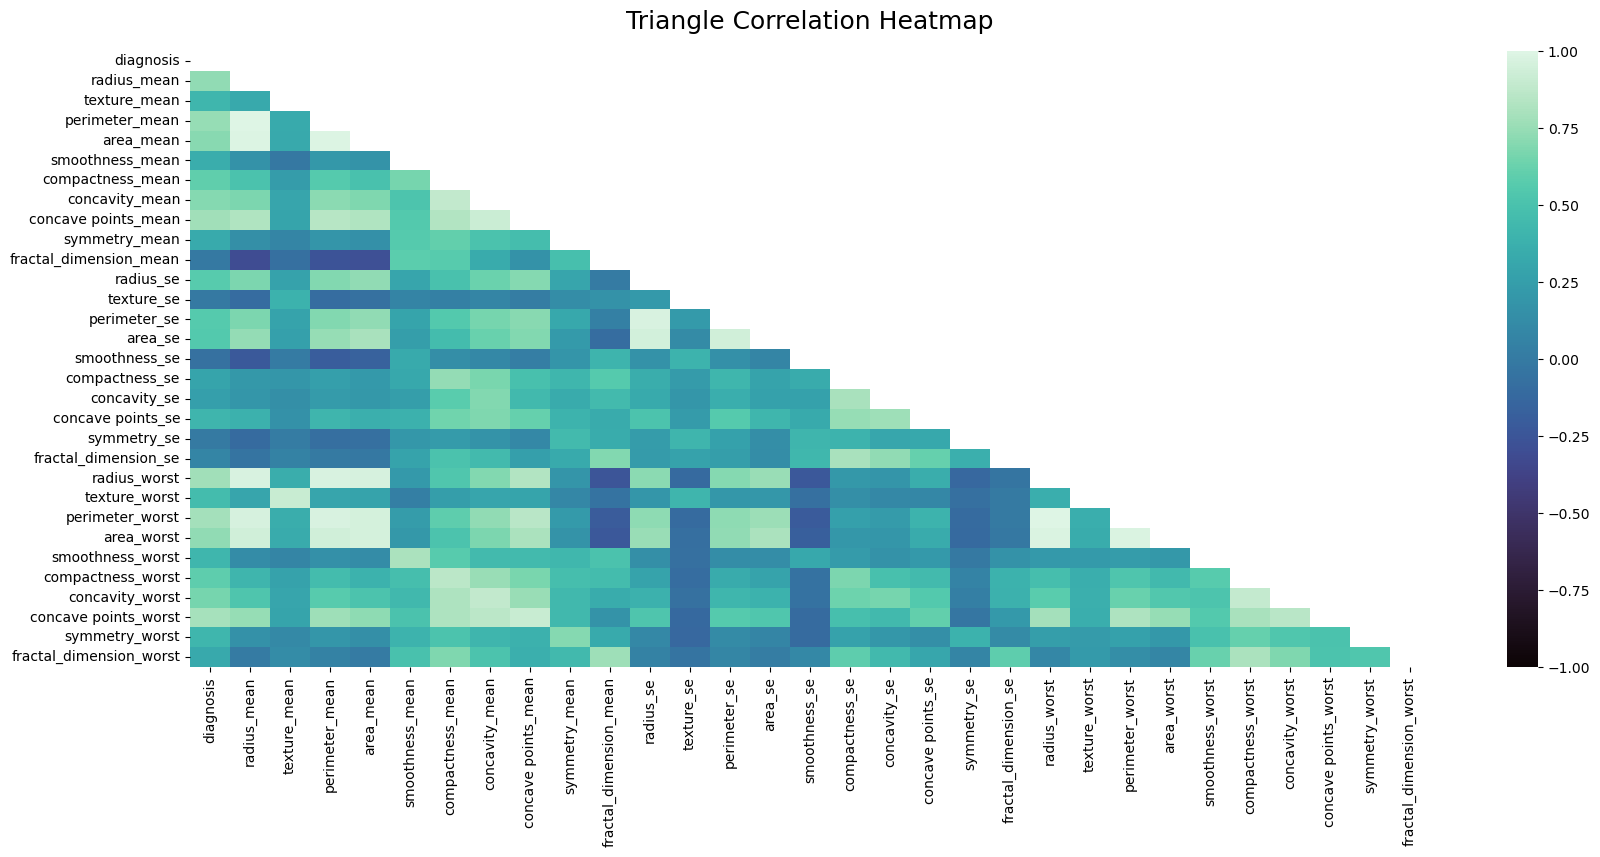

In [7]:
# Correlation heatmap
plt.figure(figsize=(20, 8))
mask = np.triu(np.ones_like(cleanedDF.corr(), dtype=bool))
cmap = sns.color_palette("mako", as_cmap=True)
heatmap = sns.heatmap(cleanedDF.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap=cmap)

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show() 

### Looking at outliers

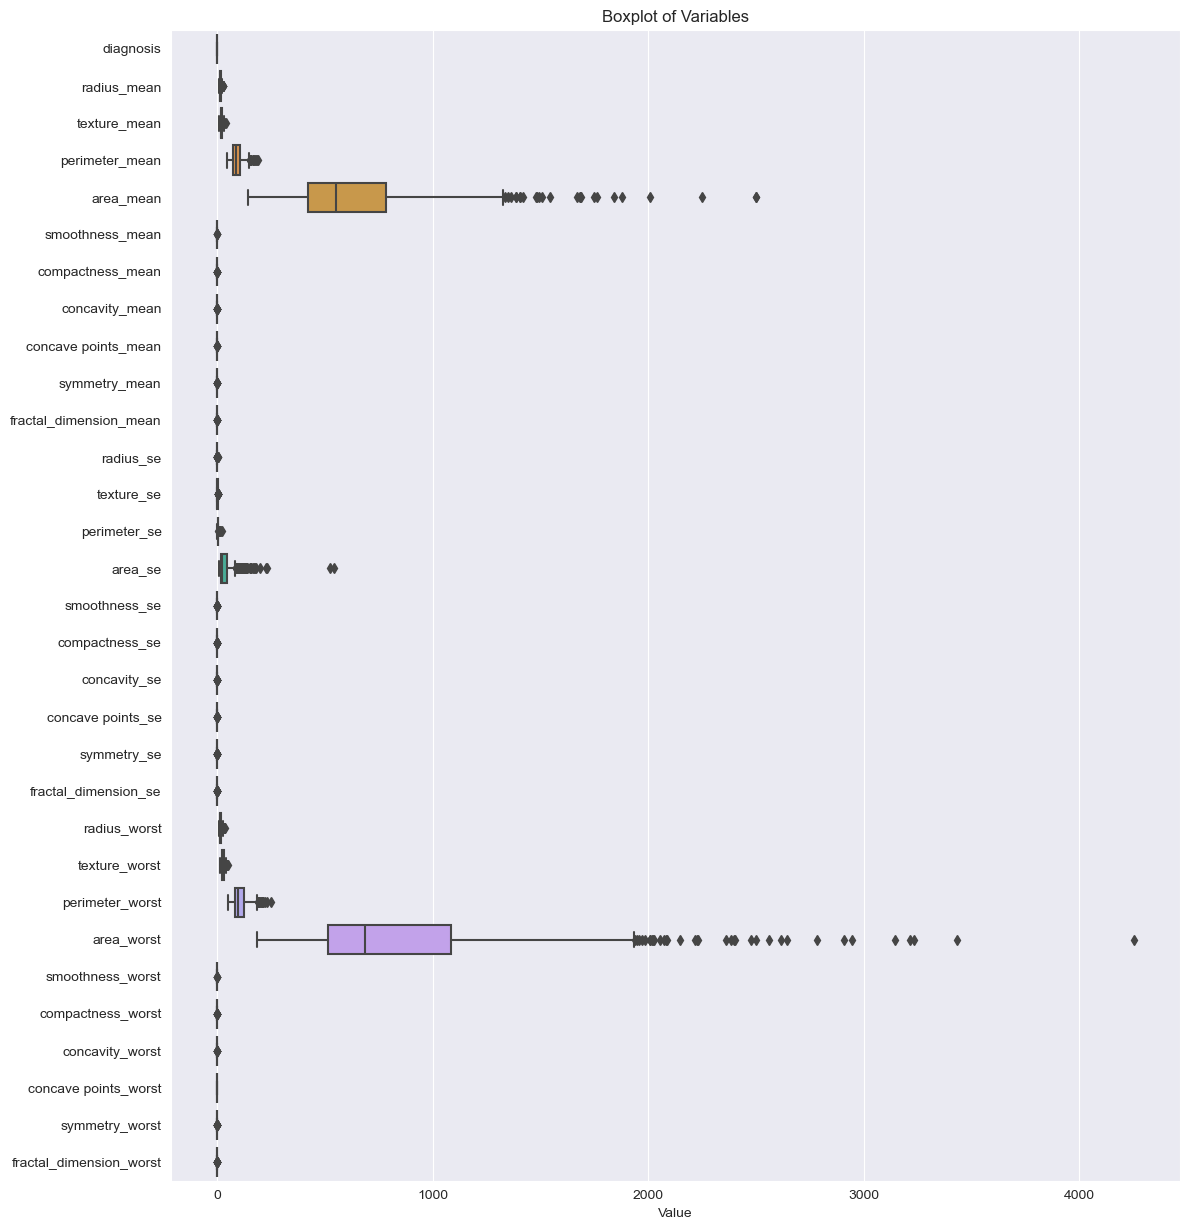

In [8]:
sns.set_style("darkgrid")

def makeBoxPlot(df, columns):
    # Melt the dataframe to long format
    meltedDF = pd.melt(cleanedDF[columns], var_name='Variable', value_name='Value')
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, len(columns) * 0.4))
    
    # Create the boxplot
    sns.boxplot(x='Value', y='Variable', data=meltedDF, orient='h', ax=ax)
    
    # Customize the plot
    ax.set_title('Boxplot of Variables')
    ax.set_xlabel('Value')
    ax.set_ylabel('')
    plt.tight_layout()
    plt.show()

makeBoxPlot(cleanedDF, numeric)

In [9]:
# Define a list with the outlier variables
outlierVariables = ['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst', 'area_worst']

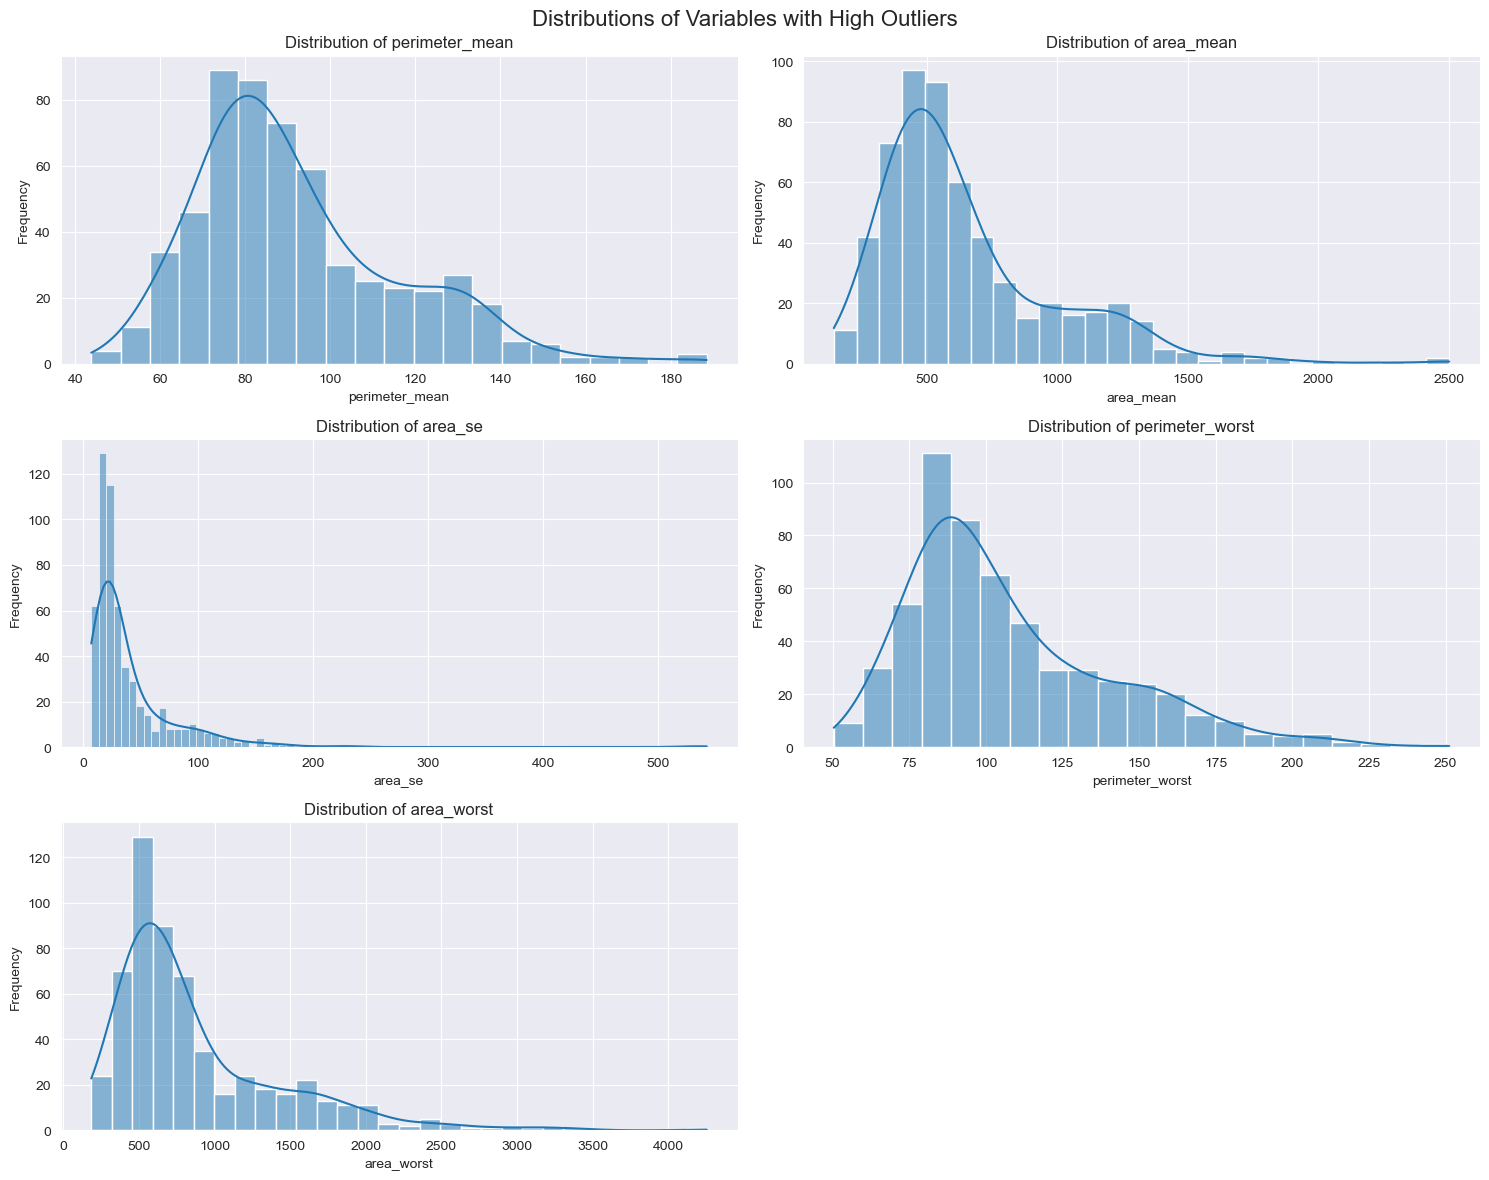

In [10]:
sns.set_style("darkgrid")

def makeDistPlot(df, variables):
    # Set up the subplot grid
    n_vars = len(variables)
    fig, axes = plt.subplots(nrows=(n_vars + 1) // 2, ncols=2, figsize=(15, 4 * ((n_vars + 1) // 2)))
    fig.suptitle('Distributions of Variables with High Outliers', fontsize=16)
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()
    
    # Create a histogram for each variable
    for i, var in enumerate(variables):
        sns.histplot(data=cleanedDF, x=var, ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frequency')
    
    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Call the function
makeDistPlot(cleanedDF, outlierVariables)

In [11]:
# Now that we've visualized our outliers, let's do an IQR analysis on them.
def iqrAnalysis(df, columns):
    results = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        iqr = Q3 - Q1
        lower = Q1 - 1.5 * iqr
        upper = Q3 + 1.5 * iqr
        
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        
        results[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': iqr,
            'Lower Bound': lower,
            'Upper Bound': upper,
            'Outliers Count': len(outliers),
            'Outliers Percentage': (len(outliers) / len(df)) * 100
        }
    
    return pd.DataFrame(results).T

iqrResults = iqrAnalysis(cleanedDF, outlierVariables)

print(iqrResults)

summary = iqrResults.sort_values('Outliers Count', ascending=False)[['Outliers Count', 'Outliers Percentage']]
print("\nColumns with the most outliers from most to least:")
print(summary)


                     Q1       Q3     IQR  Lower Bound  Upper Bound  \
perimeter_mean    75.17   104.10   28.93       31.775      147.495   
area_mean        420.30   782.70  362.40     -123.300     1326.300   
area_se           17.85    45.19   27.34      -23.160       86.200   
perimeter_worst   84.11   125.40   41.29       22.175      187.335   
area_worst       515.30  1084.00  568.70     -337.750     1937.050   

                 Outliers Count  Outliers Percentage  
perimeter_mean             13.0             2.284710  
area_mean                  25.0             4.393673  
area_se                    65.0            11.423550  
perimeter_worst            15.0             2.636204  
area_worst                 35.0             6.151142  

Columns with the most outliers from most to least:
                 Outliers Count  Outliers Percentage
area_se                    65.0            11.423550
area_worst                 35.0             6.151142
area_mean                  25.0       

### Train, Test, Split

In [12]:
# Y dataframe
yDF = cleanedDF["diagnosis"]
yDF.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [13]:
# X dataframe
xDF = cleanedDF.drop(['diagnosis'], axis=1)
xDF.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# Implement train, test, split
xTrain, xTest, yTrain, yTest = train_test_split(
    xDF, yDF,
    random_state=42         # use random state to recreate results
)

In [15]:
# Let's do something with those outliers from earlier. Instead of removing them completely, we'll just add a ceiling and a floor for each value so that it only goes to a certain point
def capValues(df, variable, lower, upper):
    # Cap values above the upper bound
    df[variable] = np.where(df[variable] > upper, upper, df[variable])
    # Cap values below the lower bound
    df[variable] = np.where(df[variable] < lower, lower, df[variable])
    return df

# Define the outlier variables and their bounds
outlierVariables = iqrResults.index.tolist()

# Iterate over the dataset and apply capping
for variable in outlierVariables:
    lower = iqrResults.loc[variable, 'Lower Bound']
    upper = iqrResults.loc[variable, 'Upper Bound']
    cleanedDF = capValues(cleanedDF, variable, lower, upper)

# Check the results
print(cleanedDF.describe())


        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.543787   639.765202   
std      0.483918     3.524049      4.301036       23.047218   305.343508   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      147.495000  1326.300000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

In [16]:
# Scale data using the MinMaxScalar since most of our data is not evenly distributed
xScaler = MinMaxScaler()
xColNames = xTrain.columns.values.tolist()
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])
xTestScaled = xScaler.transform(xTest)

In [17]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression

parameters = {'penalty': ['l1', 'l2'], 
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear']}
gridSearch = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

logisticParams = gridSearch.best_params_

logisticParams

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [18]:
# Support Vector Classifier Model

from sklearn.svm import SVC

parameters = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001], 
              'kernel':['linear','rbf']}
gridSearch = GridSearchCV(estimator = SVC(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

svcParams = gridSearch.best_params_

svcParams

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [19]:
# Multi-layer Perceptron Classifier Model

from sklearn.neural_network import MLPClassifier

parameters = parameter_space = {
    'max_iter': [1000],
    'hidden_layer_sizes': [(50,50), (50,50,50), (100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
gridSearch = GridSearchCV(estimator = MLPClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

mlpParams = gridSearch.best_params_

mlpParams

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'adaptive',
 'max_iter': 1000,
 'solver': 'adam'}

In [20]:
# Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2']}

              
gridSearch = GridSearchCV(estimator = DecisionTreeClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

treeParams = gridSearch.best_params_

treeParams

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [21]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

gridSearch = GridSearchCV(estimator=RandomForestClassifier(),
                             param_grid=parameters,
                             scoring='recall',
                             cv=5,
                             verbose=0,
                             n_jobs=-1)  # Use all available CPUs

gridSearch.fit(xTrainScaled, yTrain)

rfParams = gridSearch.best_params_
rfParams



{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [22]:
# KNN Model

from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

gridSearch = GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid=parameters,
                              scoring='recall',
                              cv=5,
                              verbose=0)

gridSearch.fit(xTrainScaled, yTrain)

knnParams = gridSearch.best_params_
knnParams


{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

In [23]:
# Let's use the pipeline feature from the scikit learn library to perform crossfold validation

# Logistic Regression Model Crossfold Validation
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', LogisticRegression(**logisticParams))
])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform cross-validation
cvResults = cross_validate(pipeline, xTrain, yTrain, cv=5, scoring=scoring)

print("Mean accuracy score:", cvResults['test_accuracy'].mean())
print("Mean f1 score:", cvResults['test_f1'].mean())
print("Mean precision score:", cvResults['test_precision'].mean())
print("Mean recall score:", cvResults['test_recall'].mean())


Mean accuracy score: 0.9741450068399453
Mean f1 score: 0.9646532656778557
Mean precision score: 0.9808333333333333
Mean recall score: 0.9495967741935484


In [24]:
# Support Vector Classifier Model Crossfold Validation
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', SVC(**svcParams))
])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform cross-validation
cvResults = cross_validate(pipeline, xTrain, yTrain, cv=5, scoring=scoring)

print("Mean accuracy score:", cvResults['test_accuracy'].mean())
print("Mean f1 score:", cvResults['test_f1'].mean())
print("Mean precision score:", cvResults['test_precision'].mean())
print("Mean recall score:", cvResults['test_recall'].mean())


Mean accuracy score: 0.9694938440492477
Mean f1 score: 0.9590824944678037
Mean precision score: 0.9574404761904762
Mean recall score: 0.9620967741935484


In [25]:
# Multi-layer Perceptron Model Crossfold Validation
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', MLPClassifier(**mlpParams))
])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform cross-validation
cvResults = cross_validate(pipeline, xTrain, yTrain, cv=5, scoring=scoring)

print("Mean accuracy score:", cvResults['test_accuracy'].mean())
print("Mean f1 score:", cvResults['test_f1'].mean())
print("Mean precision score:", cvResults['test_precision'].mean())
print("Mean recall score:", cvResults['test_recall'].mean())


Mean accuracy score: 0.9718194254445965
Mean f1 score: 0.961439393939394
Mean precision score: 0.9757352941176471
Mean recall score: 0.9495967741935484


In [26]:
# Decision Tree Model Crossfold Validation
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', DecisionTreeClassifier(**treeParams))
])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform cross-validation
cvResults = cross_validate(pipeline, xTrain, yTrain, cv=5, scoring=scoring)

print("Mean accuracy score:", cvResults['test_accuracy'].mean())
print("Mean f1 score:", cvResults['test_f1'].mean())
print("Mean precision score:", cvResults['test_precision'].mean())
print("Mean recall score:", cvResults['test_recall'].mean())


Mean accuracy score: 0.9412585499316005
Mean f1 score: 0.9217421703587023
Mean precision score: 0.9228543499511241
Mean recall score: 0.9243951612903226


In [27]:
# Random Forest Model Crossfold Validation 
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(**rfParams))
])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform cross-validation
cvResults = cross_validate(pipeline, xTrain, yTrain, cv=5, scoring=scoring)

print("Mean accuracy score:", cvResults['test_accuracy'].mean())
print("Mean f1 score:", cvResults['test_f1'].mean())
print("Mean precision score:", cvResults['test_precision'].mean())
print("Mean recall score:", cvResults['test_recall'].mean())


Mean accuracy score: 0.9531053351573189
Mean f1 score: 0.9358485958485957
Mean precision score: 0.9428327049294791
Mean recall score: 0.9308467741935484


In [28]:
# K Nearest Neighbors Model Crossfold Validation
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier(**knnParams))
])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform cross-validation
cvResults = cross_validate(pipeline, xTrain, yTrain, cv=5, scoring=scoring)

print("Mean accuracy score:", cvResults['test_accuracy'].mean())
print("Mean f1 score:", cvResults['test_f1'].mean())
print("Mean precision score:", cvResults['test_precision'].mean())
print("Mean recall score:", cvResults['test_recall'].mean())


Mean accuracy score: 0.9671135430916553
Mean f1 score: 0.9545027721118414
Mean precision score: 0.9745967741935484
Mean recall score: 0.9370967741935484


In [30]:
# Generate a table with our results
models = [
    ("Logistic Regression", LogisticRegression(**logisticParams)),
    ("SVM", SVC(**svcParams)),
    ("Neural Network", MLPClassifier(**mlpParams)),
    ("Decision Tree", DecisionTreeClassifier(**treeParams)),
    ("Random Forest", RandomForestClassifier(**rfParams)),
    ("K-NN", KNeighborsClassifier(**knnParams))
]

model_names = []
accuracies = []
f_scores = []
precisions = []
recalls = []

# Loop through each model, fit, predict, and store metrics
for name, model in models:
    model.fit(xTrainScaled, yTrain)
    preds = model.predict(xTestScaled)

    model_names.append(name)
    accuracies.append(accuracy_score(yTest, preds))
    f_scores.append(f1_score(yTest, preds))
    precisions.append(precision_score(yTest, preds))
    recalls.append(recall_score(yTest, preds))

results_df = pd.DataFrame({
    "model": model_names,
    "accuracy": accuracies,
    "fScore": f_scores,
    "precision": precisions,
    "recall": recalls
})

# Display the results
print(results_df)


Empty DataFrame
Columns: [model, accuracy, fScore, precision, recall]
Index: []
